<a href="https://colab.research.google.com/github/denisa-cernatoiu/cv1_lab/blob/main/cv1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MASTER PLAN
# importam datele - done
# verificarea integritatii datelor - dones
# impartirea datelor in train/test(/valid) - done
# preprocesarea datelor - X
#       * normalizare si augmentare - X
#       * analiza datelor - X
#       * resize - done
#       * segemntarea mainii - X
#       * hand extraction - X
# Feature extraction - X
# Clasificare - X
# PR curve / Matricea de confuzie - X

**Matrice de confuzie pt un clasificator binar**

|       |     1   |  0
|-------|---------|--------
|pred T |  100%   |  0
|       |         |
|pred N |    0    |  100%



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
bp = "/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images"

file_path_arr = []
for i in range(4):
  file_path_arr.append(glob(bp+'/'+str(i)+"/*.jpg"))
print(len(file_path_arr))
print(file_path_arr)
print(np.shape(file_path_arr))

4
[['/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/6.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/7.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/2.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/5.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/3.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/4.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/1.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/8.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/9.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/0.jpg'], ['/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/5.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/7.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/8.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/3.jpg', 

In [5]:
random.seed(42) # setam seed pt a avea toti aceleasi date

In [6]:
image_index_arr = random.sample(range(0,9), 7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [7]:
train_image_path = []
test_image_path = []

for hand_class in file_path_arr:
  # var temporare pt mentinerea claselor
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i not in image_index_arr:
      tmp_test.append(hand_class[i])
    else:
      tmp_train.append(hand_class[i])
  train_image_path.append(tmp_train)
  test_image_path.append(tmp_test)

print(np.shape(train_image_path))
print(np.shape(test_image_path))

(4, 7)
(4, 3)


In [8]:
train_images = []
test_images = []

for cls in train_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  train_images.append(t)

for cls in test_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  test_images.append(t)


print(np.shape(train_images))
print(np.shape(test_images))
# clase dimensiune canale

(4, 7, 4032, 1908, 3)
(4, 3, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7b7e0f394f80>)

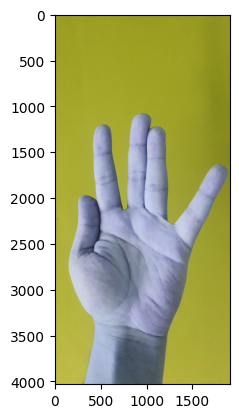

In [9]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7b7e0f21c5c0>)

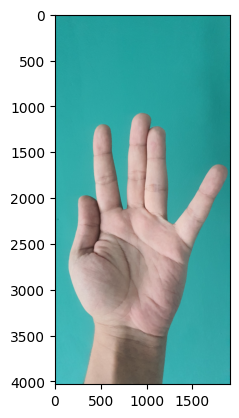

In [10]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

In [11]:
print(np.shape(img_rgb))

(4032, 1908, 3)


In [12]:
# resize all
# convert to correct color space

def resize_and_convert(image, scale_factor = 10):
  w, h, x = np.shape(image)
  im_resised = cv2.resize(image, (int(h/scale_factor), int(w/scale_factor)))
  im_rgb = cv2.cvtColor(im_resised, cv2.COLOR_BGR2RGB)
  return im_rgb

In [13]:
for i, cls in enumerate(train_images):
  for j, im in enumerate(cls):
    train_images[i][j] = resize_and_convert(im)

for i, cls in enumerate(test_images):
  for j, im in enumerate(cls):
    test_images[i][j] = resize_and_convert(im)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7b7e0f21ea80>)

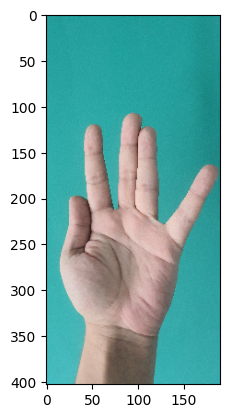

In [14]:
plt.figure(), plt.imshow(train_images[0][0])